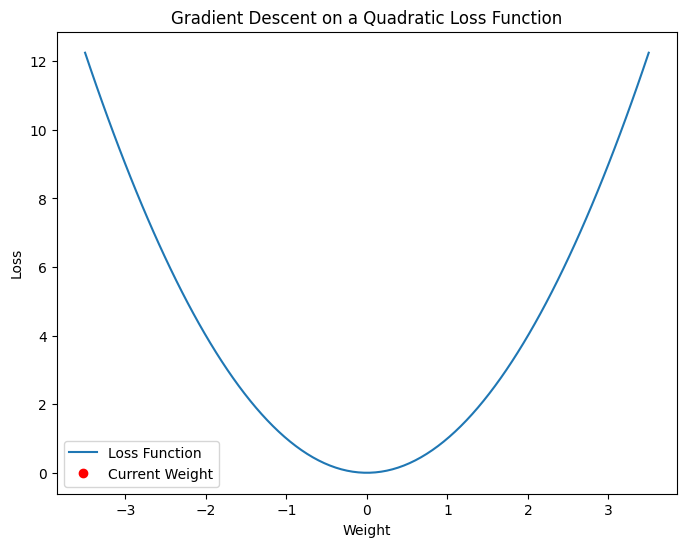

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define the loss function and its gradient
def loss_function(w):
    return w**2  # Simple quadratic function

def gradient(w):
    return 2 * w  # Derivative of the quadratic function

# Gradient Descent Parameters
learning_rate = 0.1
iterations = 50
w_history = []  # To store weight updates
loss_history = []  # To store loss values

# Initialize weight
w = 3  # Start at some random weight

# Perform Gradient Descent
for _ in range(iterations):
    w_history.append(w)
    loss_history.append(loss_function(w))
    grad = gradient(w)
    w -= learning_rate * grad

# Create Animation
fig, ax = plt.subplots(figsize=(8, 6))

# Define the range for the plot
w_values = np.linspace(-3.5, 3.5, 100)
loss_values = loss_function(w_values)

# Plot the loss surface
ax.plot(w_values, loss_values, label="Loss Function")
point, = ax.plot([], [], 'ro', label="Current Weight")
text = ax.text(0.5, 20, '', fontsize=12)

# Initialize the plot
def init():
    point.set_data([], [])
    text.set_text('')
    return point, text

# Update function for animation
def update(frame):
    w = w_history[frame]
    loss = loss_history[frame]
    point.set_data(w, loss)
    text.set_text(f"Iteration: {frame}, Weight: {w:.2f}, Loss: {loss:.2f}")
    return point, text

# Create the animation
ani = FuncAnimation(fig, update, frames=len(w_history), init_func=init, blit=True, interval=200)

# Add labels and legend
ax.set_title("Gradient Descent on a Quadratic Loss Function")
ax.set_xlabel("Weight")
ax.set_ylabel("Loss")
ax.legend()

# Display the animation
plt.show()


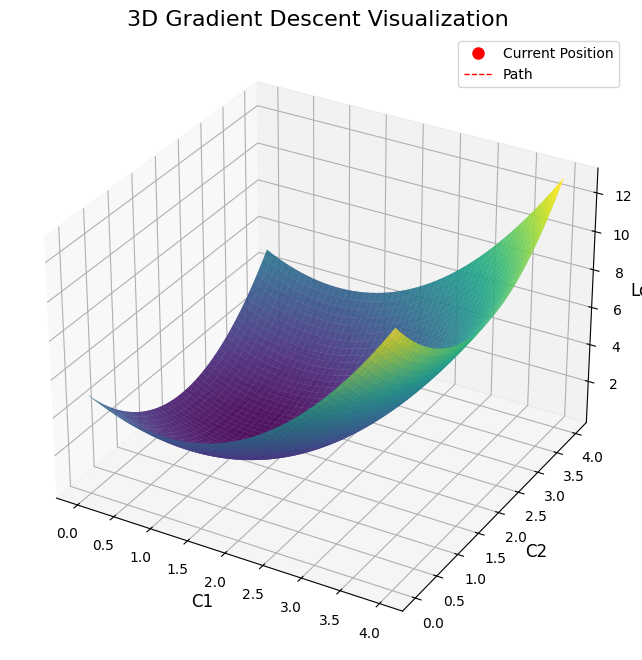

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Example loss function: f(C1, C2, C3) = (C1-1)^2 + (C2-2)^2 + (C3-3)^2
def loss_function(C1, C2, C3):
    return (C1 - 1)**2 + (C2 - 2)**2 + (C3 - 3)**2

# Simulated Gradient Descent: History of Constants (C1, C2, C3) over iterations
# Replace this with your real `Constants` history
constants_history = [
    [3, 3, 3],  # Iteration 1
    [2.5, 2.7, 2.9],  # Iteration 2
    [2.0, 2.4, 2.7],  # Iteration 3
    [1.5, 2.2, 2.5],  # Iteration 4
    [1.2, 2.1, 2.3],  # Iteration 5
    [1.0, 2.0, 2.1],  # Iteration 6 (Converged)
]

# Extract C1, C2, C3 over iterations
C1_history, C2_history, C3_history = zip(*constants_history)

# Generate Loss Surface
C1 = np.linspace(0, 4, 50)
C2 = np.linspace(0, 4, 50)
C1, C2 = np.meshgrid(C1, C2)
C3 = 3  # Keep C3 constant for the surface
Loss = loss_function(C1, C2, C3)

# Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.8, edgecolor='none')

# Initialize the animation point
point, = ax.plot([], [], [], 'ro', markersize=8, label="Current Position")
path, = ax.plot([], [], [], 'r--', linewidth=1, label="Path")

# Initialize plot
def init():
    point.set_data([], [])
    point.set_3d_properties([])
    path.set_data([], [])
    path.set_3d_properties([])
    return point, path

# # Update function for animation
# def update(frame):
#     point.set_data(C1_history[frame], C2_history[frame])
#     point.set_3d_properties(loss_function(C1_history[frame], C2_history[frame], C3_history[frame]))

#     path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
#     path.set_3d_properties([loss_function(c1, c2, c3) for c1, c2, c3 in zip(C1_history[:frame + 1], C2_history[:frame + 1], C3_history[:frame + 1])])
#     return point, path

# Update function for animation
def update(frame):
    # Current position
    point.set_data(C1_history[frame], C2_history[frame])
    point.set_3d_properties(loss_function(C1_history[frame], C2_history[frame], C3_history[frame]))

    # Path connecting all previous points
    path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
    path.set_3d_properties([loss_function(c1, c2, c3) for c1, c2, c3 in zip(C1_history[:frame + 1], C2_history[:frame + 1], C3_history[:frame + 1])])
    return point, path


# Create animation
ani = FuncAnimation(fig, update, frames=len(C1_history), init_func=init, blit=True, interval=500)

# Add labels and legend
ax.set_title("3D Gradient Descent Visualization", fontsize=16)
ax.set_xlabel("C1", fontsize=12)
ax.set_ylabel("C2", fontsize=12)
ax.set_zlabel("Loss", fontsize=12)
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.6, edgecolor='none')
ax.legend()

plt.show()


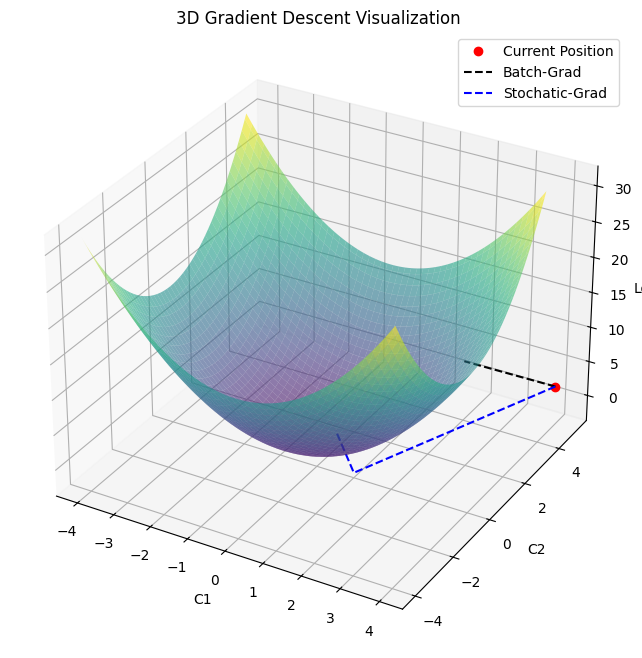

<ipython-input-5-073a8c3dcf2a>:52: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(C1_history[frame], C2_history[frame])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

# Example Loss Function (Quadratic Form)
def loss_function(C1, C2, C3):
    return C1**2 + C2**2 + C3**2



# Simulated Constants History
np.random.seed(42)
iterations = 100
C1_history = np.linspace(3.0, 0.0, iterations)
C2_history = np.linspace(4.0, 0.0, iterations)
C3_history = np.linspace(5.0, 0.0, iterations)

# Compute Loss History
Loss_history = [loss_function(C1, C2, C3) for C1, C2, C3 in zip(C1_history, C2_history, C3_history)]

# Create Meshgrid for Surface Plot
C1 = np.linspace(-4, 4, 100)
C2 = np.linspace(-4, 4, 100)
C1, C2 = np.meshgrid(C1, C2)
C3 = 0.0  # Keeping C3 constant for 2D loss surface
Loss = loss_function(C1, C2, C3)

# Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.6, edgecolor='none')

# Initialize Scatter and Path Line
point, = ax.plot([4], [5], [2], 'ro', label="Current Position")  # Current point
path, = ax.plot([4,2], [5,4], [2,5], linestyle='--', color='black', label="Batch-Grad")  # Path with a blue dashed line
path, = ax.plot([4,1,0], [5,0,1], [2,-3,-1], linestyle='--', color='blue', label="Stochatic-Grad")  # Path with a blue dashed line

# Labeling
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('Loss')
ax.set_title('3D Gradient Descent Visualization')
ax.legend()

# Update function for the animation
def update(frame):
    # Update the current position
    point.set_data(C1_history[frame], C2_history[frame])
    point.set_3d_properties(Loss_history[frame])

    # Update the path
    path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
    path.set_3d_properties(Loss_history[:frame + 1])
    return point, path

# Create Animation
ani = FuncAnimation(fig, update, frames=iterations, interval=100, blit=False)

# Show Plot
plt.show()



# Save as MP4 using FFMpegWriter
ani.save("gradient_descent.gif", writer=FFMpegWriter(fps=30))



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
life=pd.read_csv("Life Expectancy Data.csv")
life.columns=['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol', 'Percentage Expenditure', 'Hepatitis B',
       'Measles', ' BMI', 'Under-Five Deaths', 'Polio', 'Total Expenditure',
       'Diphtheria','HIV/AIDS', 'GDP', 'Population',
       'Thinness  1-19 years', 'Thinness 5-9 years',
       'Income composition of resources', 'Schooling']
life

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 years,Thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputedData=imp_median.fit_transform(life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']])
life[['Life Expectancy','Alcohol','Hepatitis B','Polio','Diphtheria']]=imputedData
print(life.isna().sum())

Country                              0
Year                                 0
Status                               0
Life Expectancy                      0
Adult Mortality                     10
Infant Deaths                        0
Alcohol                              0
Percentage Expenditure               0
Hepatitis B                          0
Measles                              0
 BMI                                34
Under-Five Deaths                    0
Polio                                0
Total Expenditure                  226
Diphtheria                           0
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness  1-19 years                34
Thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
scaler = StandardScaler()
X=life[['Alcohol', 'Hepatitis B','Measles','Polio','Diphtheria', 'HIV/AIDS']]
X=pd.DataFrame(data=scaler.fit_transform(X),columns=X.columns)
y=life['Life Expectancy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
grad=pd.read_csv("gradient.csv")

In [ ]:
grad['Alcohol'].min()

-3.19464740400841

In [ ]:
grad['Polio'].max()

9.95436150096964

In [ ]:
grad['Polio'].min()

-3.97122468040084

In [ ]:
grad

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1881,2.671573,-0.714188,-0.831115,1.543527,2.115621,-4.615620,68.872489,Mini-Batch-Gradient
1882,2.675242,-0.711498,-0.839367,1.539336,2.132980,-4.645573,68.910393,Mini-Batch-Gradient
1883,2.665140,-0.710431,-0.805829,1.545950,2.141286,-4.650429,68.934903,Mini-Batch-Gradient
1884,2.673347,-0.712331,-0.801184,1.560889,2.164302,-4.674466,68.918376,Mini-Batch-Gradient


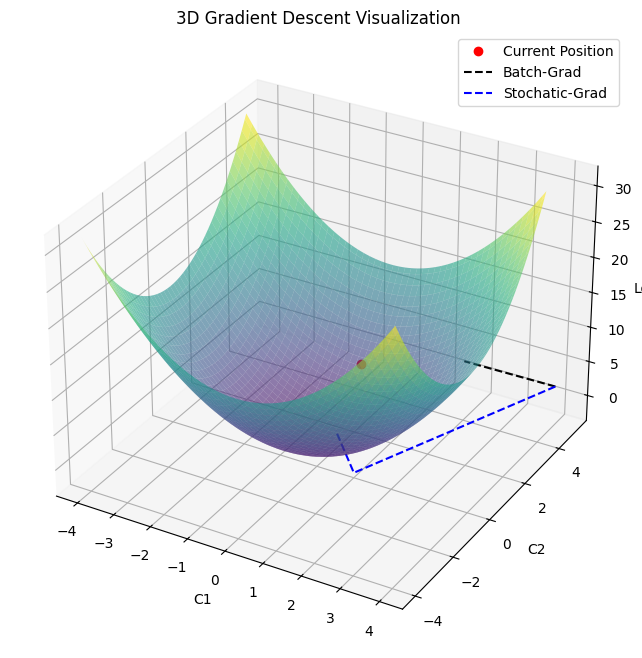

<ipython-input-29-63b70322f634>:63: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(C1_history[frame], C2_history[frame])
Error writing trailer of gradient_descent.gif: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x800', '-pix_fmt', 'rgba', '-framerate', '30', '-loglevel', 'error', '-i', 'pipe:', '-filter_complex', 'split [a][b];[a] palettegen [p];[b][p] paletteuse', '-y', 'gradient_descent.gif']' returned non-zero exit status 255.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
# Example Loss Function (Quadratic Form)
def loss_function(C1, C2):
    out=y_test.values
    length=len(X_test.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X_test.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE



# Simulated Constants History
np.random.seed(42)
iterations = 401
C1_history = np.linspace(-10, 10, iterations)
C2_history = np.linspace(-10, 10, iterations)




# Compute Loss History
Loss_history = [loss_function(C1, C2) for C1, C2 in zip(C1_history, C2_history)]

# Create Meshgrid for Surface Plot
C1 = np.linspace(-4, 4, 100)
C2 = np.linspace(-4, 4, 100)
C1, C2 = np.meshgrid(C1, C2)

Loss = loss_function(C1, C2)

# Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.6, edgecolor='none')

# Initialize Scatter and Path Line
point, = ax.plot([0.71412257], [0.95880379], [10], 'ro', label="Current Position")  # Current point
path, = ax.plot([4,2], [5,4], [2,5], linestyle='--', color='black', label="Batch-Grad")  # Path with a blue dashed line
path, = ax.plot([4,1,0], [5,0,1], [2,-3,-1], linestyle='--', color='blue', label="Stochatic-Grad")  # Path with a blue dashed line

# Labeling
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('Loss')
ax.set_title('3D Gradient Descent Visualization')
ax.legend()

# Update function for the animation
def update(frame):
    # Update the current position
    point.set_data(C1_history[frame], C2_history[frame])
    point.set_3d_properties(Loss_history[frame])

    # Update the path
    path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
    path.set_3d_properties(Loss_history[:frame + 1])
    return point, path

# Create Animation
ani = FuncAnimation(fig, update, frames=iterations, interval=100, blit=False)

# Show Plot
plt.show()



# Save as MP4 using FFMpegWriter
ani.save("gradient_descent.gif", writer=FFMpegWriter(fps=30))



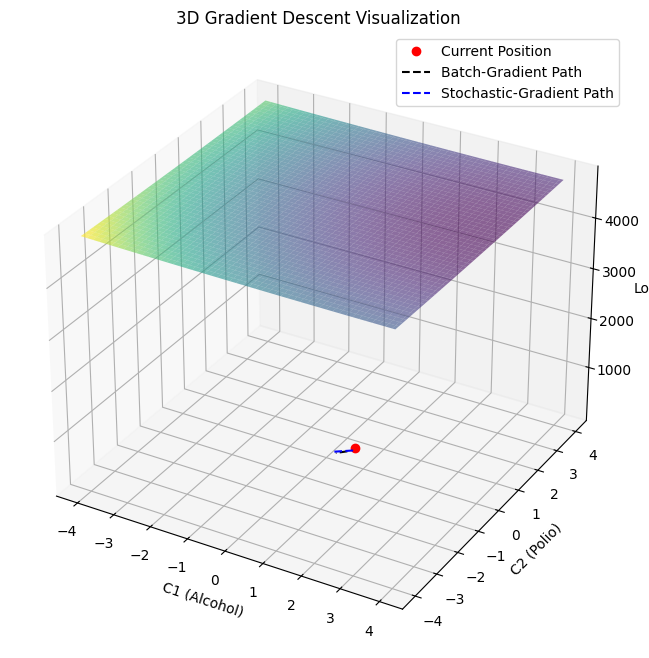

<ipython-input-48-2d192e5c7ef9>:65: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  point.set_data(C1_history[frame], C2_history[frame])


CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '1000x800', '-pix_fmt', 'rgba', '-framerate', '30', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'gradient_descent.mp4']' returned non-zero exit status 255.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

# Load gradient weights from CSV
gradient_data = pd.read_csv("gradient.csv")

# Example Loss Function (Quadratic Form)
def loss_function(C1, C2):
    """
    Calculate the Mean Squared Error (MSE) for the test set using given slopes C1 (Alcohol) and C2 (Polio).
    """
    # Combine the slopes (C1 and C2) with the remaining weights (bias term)
    slopes = np.array([C1, C2])
    c = 0  # Assuming no bias term or you can modify as needed.

    # Predicted y values using the linear model
    y_pred = np.dot(X_test[['Alcohol', 'Hepatitis B']], slopes) + c  # Linear prediction for test set

    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((y_pred - y_test) ** 2)
    return mse

# Extracting constants history from the gradient data
iterations = len(gradient_data)
C1_history = gradient_data['Alcohol'].values
C2_history = gradient_data['Hepatitis'].values

# Simulate Loss History
Loss_history = [loss_function(C1, C2) for C1, C2 in zip(C1_history, C2_history)]

# Create Meshgrid for Surface Plot
C1 = np.linspace(-4, 4, 100)
C2 = np.linspace(-4, 4, 100)
C1, C2 = np.meshgrid(C1, C2)

# Use average weights for fixed constants in the loss surface
Loss = np.array([[loss_function(c1, c2) for c1, c2 in zip(row_C1, row_C2)]
                 for row_C1, row_C2 in zip(C1, C2)])

# Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.6, edgecolor='none')

# Initialize Scatter and Path Line
batch=grad.loc[grad['Algo']=='Batch-Gradient']
lip_batch=grad.loc[grad['Algo']=='Lip-Batch']
stochatic=grad.loc[grad['Algo']=='Stochastic-Gradient']
lip_stochatic=grad.loc[grad['Algo']=='Lip-Stochastic']
mini_batch=grad.loc[grad['Algo']=='Mini-Batch-Gradient']
lip_mini_batch=grad.loc[grad['Algo']=='Lip-Mini-Batch']
momentum=grad.loc[grad['Algo']=='Momentum-Gradient']
nestrov=grad.loc[grad['Algo']=='Nestrov-Gradient']

point, = ax.plot([0.71412257][ 0.95880379], [4755.8340842394], 'ro', label="Current Position")  # Current point
path, = ax.plot(np.array(batch[['Alcohol','Hepatitis']]), linestyle='--', color='black', label="Batch-Gradient Path")
path, = ax.plot(np.array(lip_batch[['Alcohol','Hepatitis']]), linestyle='--', color='blue', label="Lip-Batch-Gradient Path")
path, = ax.plot(np.array(stochatic[['Alcohol','Hepatitis']]), linestyle='--', color='green', label="Stochastic-Gradient Path")
path, = ax.plot(np.array(lip_stochatic[['Alcohol','Hepatitis']]), linestyle='--', color='orange', label="Lip-Stochastic-Gradient Path")
path, = ax.plot(np.array(mini_batch[['Alcohol','Hepatitis']]), linestyle='--', color='purple', label="Mini-Batch-Gradient Path")
path, = ax.plot(np.array(lip_mini_batch[['Alcohol','Hepatitis']]), linestyle='--', color='pink', label="Lip-Mini-Batch-Gradient Path")
path, = ax.plot(np.array(momentum[['Alcohol','Hepatitis']]), linestyle='--', color='brown', label="Momentum-Gradient Path")
path, = ax.plot(np.array(nestrov[['Alcohol','Hepatitis']]), linestyle='--', color='gray', label="Nestrov-Gradient Path")


# Labeling
ax.set_xlabel('C1 (Alcohol)')
ax.set_ylabel('C2 (Hepatitis B)')
ax.set_zlabel('Loss')
ax.set_title('3D Gradient Descent Visualization')
ax.legend()

# Update function for the animation
def update(frame):
    # Update the current position
    point.set_data(C1_history[frame], C2_history[frame])
    point.set_3d_properties(Loss_history[frame])

    # Update the paths
    path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
    path.set_3d_properties(Loss_history[:frame + 1])

    stochastic_path.set_data(C1_history[:frame + 1], C2_history[:frame + 1])
    stochastic_path.set_3d_properties(Loss_history[:frame + 1])

    return point, path, stochastic_path

# Create Animation
ani = FuncAnimation(fig, update, frames=iterations, interval=100, blit=False)

# Show Plot
plt.show()

# Save as MP4 using FFMpegWriter
ani.save("gradient_descent.mp4", writer=FFMpegWriter(fps=30))


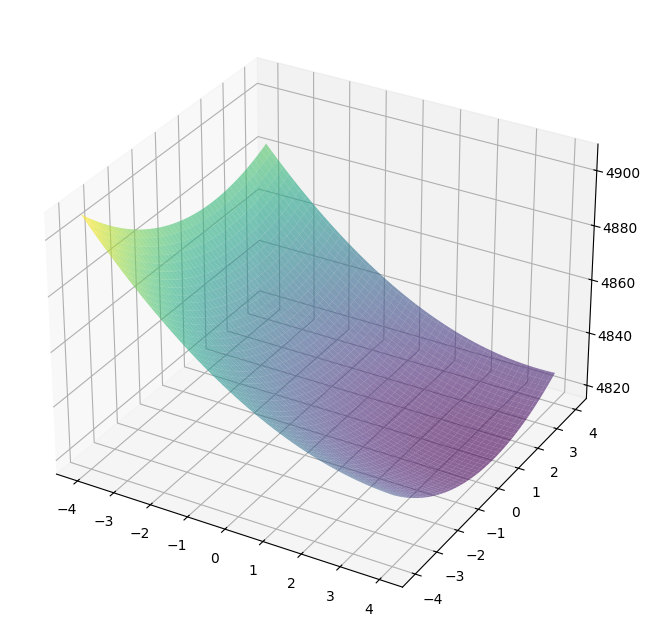

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter

# Load gradient weights from CSV
gradient_data = pd.read_csv("gradient.csv")

# Example Loss Function (Quadratic Form)
def loss_function(C1, C2):
    """
    Calculate the Mean Squared Error (MSE) for the test set using given slopes C1 (Alcohol) and C2 (Polio).
    """
    # Combine the slopes (C1 and C2) with the remaining weights (bias term)
    slopes = np.array([C1, C2])
    c = 0  # Assuming no bias term or you can modify as needed.

    # Predicted y values using the linear model
    y_pred = np.dot(X_test[['Alcohol', 'Hepatitis B']], slopes) + c  # Linear prediction for test set

    # Calculate the Mean Squared Error (MSE)
    mse = np.mean((y_pred - y_test) ** 2)
    return mse

# Extracting constants history from the gradient data
iterations = len(gradient_data)
C1_history = gradient_data['Alcohol'].values
C2_history = gradient_data['Hepatitis'].values

# Simulate Loss History
Loss_history = [loss_function(C1, C2) for C1, C2 in zip(C1_history, C2_history)]

# Create Meshgrid for Surface Plot
C1 = np.linspace(-4, 4, 100)
C2 = np.linspace(-4, 4, 100)
C1, C2 = np.meshgrid(C1, C2)

# Use average weights for fixed constants in the loss surface
Loss = np.array([[loss_function(c1, c2) for c1, c2 in zip(row_C1, row_C2)]
                 for row_C1, row_C2 in zip(C1, C2)])

# Create 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the loss surface
ax.plot_surface(C1, C2, Loss, cmap='viridis', alpha=0.6, edgecolor='none')

# Update function for the animation
def update(frame):
    # Extract current slopes
    current_C1 = C1_history[frame]
    current_C2 = C2_history[frame]

    # Compute the current loss using the loss function
    current_loss = loss_function(current_C1, current_C2)

    # Update the current position (point)
    point.set_data([current_C1], [current_C2])
    point.set_3d_properties([current_loss])

    # Update paths for each gradient descent algorithm
    batch_path.set_data(batch['Alcohol'][:frame + 1], batch['Hepatitis'][:frame + 1])
    batch_losses = [loss_function(c1, c2) for c1, c2 in zip(batch['Alcohol'][:frame + 1], batch['Hepatitis'][:frame + 1])]
    batch_path.set_3d_properties(batch_losses)

    lip_batch_path.set_data(lip_batch['Alcohol'][:frame + 1], lip_batch['Hepatitis'][:frame + 1])
    lip_batch_losses = [loss_function(c1, c2) for c1, c2 in zip(lip_batch['Alcohol'][:frame + 1], lip_batch['Hepatitis'][:frame + 1])]
    lip_batch_path.set_3d_properties(lip_batch_losses)

    stochastic_path.set_data(stochatic['Alcohol'][:frame + 1], stochatic['Hepatitis'][:frame + 1])
    stochastic_losses = [loss_function(c1, c2) for c1, c2 in zip(stochatic['Alcohol'][:frame + 1], stochatic['Hepatitis'][:frame + 1])]
    stochastic_path.set_3d_properties(stochastic_losses)

    lip_stochastic_path.set_data(lip_stochatic['Alcohol'][:frame + 1], lip_stochatic['Hepatitis'][:frame + 1])
    lip_stochastic_losses = [loss_function(c1, c2) for c1, c2 in zip(lip_stochatic['Alcohol'][:frame + 1], lip_stochatic['Hepatitis'][:frame + 1])]
    lip_stochastic_path.set_3d_properties(lip_stochastic_losses)

    mini_batch_path.set_data(mini_batch['Alcohol'][:frame + 1], mini_batch['Hepatitis'][:frame + 1])
    mini_batch_losses = [loss_function(c1, c2) for c1, c2 in zip(mini_batch['Alcohol'][:frame + 1], mini_batch['Hepatitis'][:frame + 1])]
    mini_batch_path.set_3d_properties(mini_batch_losses)

    lip_mini_batch_path.set_data(lip_mini_batch['Alcohol'][:frame + 1], lip_mini_batch['Hepatitis'][:frame + 1])
    lip_mini_batch_losses = [loss_function(c1, c2) for c1, c2 in zip(lip_mini_batch['Alcohol'][:frame + 1], lip_mini_batch['Hepatitis'][:frame + 1])]
    lip_mini_batch_path.set_3d_properties(lip_mini_batch_losses)

    momentum_path.set_data(momentum['Alcohol'][:frame + 1], momentum['Hepatitis'][:frame + 1])
    momentum_losses = [loss_function(c1, c2) for c1, c2 in zip(momentum['Alcohol'][:frame + 1], momentum['Hepatitis'][:frame + 1])]
    momentum_path.set_3d_properties(momentum_losses)

    nesterov_path.set_data(nestrov['Alcohol'][:frame + 1], nestrov['Hepatitis'][:frame + 1])
    nesterov_losses = [loss_function(c1, c2) for c1, c2 in zip(nestrov['Alcohol'][:frame + 1], nestrov['Hepatitis'][:frame + 1])]
    nesterov_path.set_3d_properties(nesterov_losses)

    return (point, batch_path, lip_batch_path, stochastic_path, lip_stochastic_path,
            mini_batch_path, lip_mini_batch_path, momentum_path, nesterov_path)

# Create Animation
ani = FuncAnimation(fig, update, frames=iterations, interval=100, blit=False)

# Show Plot
plt.show()

# Save as MP4 using FFMpegWriter
ani.save("gradient_descent.mp4", writer=FFMpegWriter(fps=30))




In [ ]:
def hi():
  print(X_test.shape[0])

In [ ]:
hi()

882


In [ ]:
X_test.columns

Index(['Alcohol', 'Hepatitis B'], dtype='object')

In [ ]:
gradient_data

,Alcohol,Hepatitis,Measles,Polio,Diphtheria,HIV/AIDS,Y-Intercept,Algo
0,0.775971,0.966025,0.452974,1.015007,0.420986,0.032844,2.117346,Batch-Gradient
1,0.835276,0.970826,0.394649,1.087785,0.501400,-0.086629,3.462834,Batch-Gradient
2,0.892159,0.973380,0.338813,1.156221,0.577330,-0.202484,4.781373,Batch-Gradient
3,0.946737,0.973848,0.285358,1.220551,0.649024,-0.314852,6.073506,Batch-Gradient
4,0.999120,0.972382,0.234181,1.281002,0.716713,-0.423860,7.339762,Batch-Gradient
...,...,...,...,...,...,...,...,...
1881,2.671573,-0.714188,-0.831115,1.543527,2.115621,-4.615620,68.872489,Mini-Batch-Gradient
1882,2.675242,-0.711498,-0.839367,1.539336,2.132980,-4.645573,68.910393,Mini-Batch-Gradient
1883,2.665140,-0.710431,-0.805829,1.545950,2.141286,-4.650429,68.934903,Mini-Batch-Gradient
1884,2.673347,-0.712331,-0.801184,1.560889,2.164302,-4.674466,68.918376,Mini-Batch-Gradient


In [ ]:
batch=grad.loc[grad['Algo']=='Batch-Gradient']
lip_batch=grad.loc[grad['Algo']=='Lip-Batch']
stochatic=grad.loc[grad['Algo']=='Stochastic-Gradient']
lip_stochatic=grad.loc[grad['Algo']=='Lip-Stochastic']
mini_batch=grad.loc[grad['Algo']=='Mini-Batch-Gradient']
lip_mini_batch=grad.loc[grad['Algo']=='Lip-Mini-Batch']
momentum=grad.loc[grad['Algo']=='Momentum-Gradient']
nestrov=grad.loc[grad['Algo']=='Nestrov-Gradient']

In [ ]:
np.array(batch[['Alcohol','Hepatitis']])

array([[ 7.75971466e-01,  9.66024647e-01],
       [ 8.35276033e-01,  9.70826040e-01],
       [ 8.92158980e-01,  9.73379776e-01],
       [ 9.46736700e-01,  9.73847624e-01],
       [ 9.99119603e-01,  9.72381866e-01],
       [ 1.04941243e+00,  9.69125820e-01],
       [ 1.09771456e+00,  9.64214333e-01],
       [ 1.14412026e+00,  9.57774250e-01],
       [ 1.18871901e+00,  9.49924853e-01],
       [ 1.23159568e+00,  9.40778283e-01],
       [ 1.27283085e+00,  9.30439933e-01],
       [ 1.31250098e+00,  9.19008824e-01],
       [ 1.35067863e+00,  9.06577961e-01],
       [ 1.38743270e+00,  8.93234663e-01],
       [ 1.42282858e+00,  8.79060887e-01],
       [ 1.45692837e+00,  8.64133520e-01],
       [ 1.48979102e+00,  8.48524673e-01],
       [ 1.52147252e+00,  8.32301940e-01],
       [ 1.55202603e+00,  8.15528655e-01],
       [ 1.58150205e+00,  7.98264136e-01],
       [ 1.60994855e+00,  7.80563906e-01],
       [ 1.63741110e+00,  7.62479913e-01],
       [ 1.66393301e+00,  7.44060729e-01],
       [ 1.

In [ ]:
def LinearPrediction(X,y,Constants,Lambda):
    out=y.values
    length=len(X.columns)
    slopes=Constants[:length]
    c=Constants[length]
    size=X.shape[0]
    Ypred=X.apply(lambda x: np.sum(np.multiply(x,slopes))+c,axis=1)
    MSE=(((Ypred-out)**2).sum()+Lambda*(np.sum(np.square(Constants))))/size
    return MSE

In [ ]:
Constants=np.array([0.71412257, 0.95880379, 0.51390224, 0.93763644, 0.33583024,
       0.15607157, 0.74435779])

In [ ]:
LinearPrediction(X_test,y_test,Constants,0.1)

4755.8340842394